# COVID-19 in Ireland
__Alessandra Ravida__ - _UCDPA Certificate in Introductory Data Analytics - January 2022_

***

## Abstract
In this project I am analysing Covid-19 datasets in Ireland. Firstly I'll explore the datasets per se, looking for interesting patterns, and then I'll try to contextualise patterns and explore correlations with other data (such as impact of some govenrnment restrictions on some specific cohorts, infection trends in other countries, and temperature and weather conditions).

***

## Python Modules

__Import all Relevant Modules__

In [4]:
#Here I import requests, numpy, pandas, matplotlib and seaborn

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

## Import and Clean data

__Importing COVID-19 Dataset for Ireland__
[Click here for dataset source](https://covid-19.geohive.ie/datasets/d8eb52d56273413b84b0187a4e9117be/explore?showTable=true)

In [5]:
#This dataset is a csv file saved locally, I import it as Pandas DataFrame.

covid_IRL = pd.read_csv('/Users/Alessandra/Dropbox/Data Analytics/Project/UCDPA_AlessandraRavida/Data/COVID-19_HPSC_Detailed_Statistics_Profile.csv')

__Understanding the dataset__

Check basic data structure of the data set via .info(), .head() functions.
Also note the first and last day of dataset for personal reference.

In [6]:
#I start analysing structure of the df
covid_IRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            673 non-null    float64
 1   Y                            673 non-null    float64
 2   Date                         673 non-null    object 
 3   ConfirmedCovidCases          673 non-null    int64  
 4   TotalConfirmedCovidCases     673 non-null    int64  
 5   ConfirmedCovidDeaths         502 non-null    float64
 6   TotalCovidDeaths             673 non-null    int64  
 7   StatisticsProfileDate        673 non-null    object 
 8   CovidCasesConfirmed          671 non-null    float64
 9   HospitalisedCovidCases       671 non-null    float64
 10  RequiringICUCovidCases       671 non-null    float64
 11  HealthcareWorkersCovidCases  671 non-null    float64
 12  ClustersNotified             651 non-null    float64
 13  HospitalisedAged5   

In [7]:
#look at the first 5 rows of the dataset

covid_IRL.head()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,StatisticsProfileDate,CovidCasesConfirmed,HospitalisedCovidCases,...,CommunityTransmission,CloseContact,TravelAbroad,FID,HospitalisedAged65to74,HospitalisedAged75to84,HospitalisedAged85up,Aged65to74,Aged75to84,Aged85up
0,-7.692596,53.288234,2020/02/29 00:00:00+00,1,1,0.0,0,2020/02/27 00:00:00+00,NaN,NaN,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,-7.692596,53.288234,2020/03/03 00:00:00+00,1,2,0.0,0,2020/03/01 00:00:00+00,NaN,NaN,...,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2,-7.692596,53.288234,2020/03/04 00:00:00+00,4,6,0.0,0,2020/03/02 00:00:00+00,1.0,0.0,...,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
3,-7.692596,53.288234,2020/03/05 00:00:00+00,7,13,0.0,0,2020/03/03 00:00:00+00,2.0,1.0,...,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.692596,53.288234,2020/03/06 00:00:00+00,5,18,0.0,0,2020/03/04 00:00:00+00,5.0,4.0,...,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
"""
First date in dataset is 29th of Feb 2020.
I now check what's the last date.
This information will be important to slice other time-based datasets.
"""
#I select the last row of the dataframe via its index number and only the date column

covid_IRL.loc[672 , "Date"]

'2022/01/03 00:00:00+00'

__Cleaning the dataset__

Check for NaN values and replace them with 0.0

In [9]:
""" 
In the first rows of the df, there are some NaN.
I believe that for the first few days they might not have 
tested all hospitalised patients for COVID hence it's more correct 
to report those values as NaN rather than 0.0, however I think that
for the purposese of my analysis, it's safe to convert NaN into 0.0.
"""

#I check in how many more instances I find NaN in the dataset

covid_IRL.isna().sum()

X                                0
Y                                0
Date                             0
ConfirmedCovidCases              0
TotalConfirmedCovidCases         0
ConfirmedCovidDeaths           171
TotalCovidDeaths                 0
StatisticsProfileDate            0
CovidCasesConfirmed              2
HospitalisedCovidCases           2
RequiringICUCovidCases           2
HealthcareWorkersCovidCases      2
ClustersNotified                22
HospitalisedAged5                2
HospitalisedAged5to14            2
HospitalisedAged15to24           2
HospitalisedAged25to34           2
HospitalisedAged35to44           2
HospitalisedAged45to54           2
HospitalisedAged55to64           2
Male                             2
Female                           2
Unknown                          2
Aged1to4                         2
Aged5to14                        2
Aged15to24                       2
Aged25to34                       2
Aged35to44                       2
Aged45to54          

In [11]:
""" 
The column with most NaN is ConfirmedCovidDeaths, 
this is due to the fact that the reporting system for 
COVID deaths has changed in the summer of 2021 from a daily
to a weekly report, hence numbers appear now only 
once a week.

Note:It might be better to analyse data on a weekly 
basis rather than on a dayly basis
"""

#replacing NaN with 0 and check if successful

covid_IRL_fill = covid_IRL.fillna(0)
covid_IRL_fill.isna().sum()

X                              0
Y                              0
Date                           0
ConfirmedCovidCases            0
TotalConfirmedCovidCases       0
ConfirmedCovidDeaths           0
TotalCovidDeaths               0
StatisticsProfileDate          0
CovidCasesConfirmed            0
HospitalisedCovidCases         0
RequiringICUCovidCases         0
HealthcareWorkersCovidCases    0
ClustersNotified               0
HospitalisedAged5              0
HospitalisedAged5to14          0
HospitalisedAged15to24         0
HospitalisedAged25to34         0
HospitalisedAged35to44         0
HospitalisedAged45to54         0
HospitalisedAged55to64         0
Male                           0
Female                         0
Unknown                        0
Aged1to4                       0
Aged5to14                      0
Aged15to24                     0
Aged25to34                     0
Aged35to44                     0
Aged45to54                     0
Aged55to64                     0
Median_Age

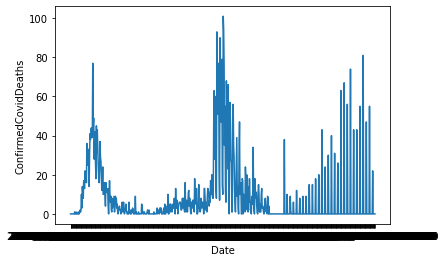

'\nI need to address the display of the x-axis to tidy up the visualisation\n'

In [13]:
"""
I want to see how the confirmed covid deaths column looks,
i think it's misleading since all the other data is daily.

If I use this column I will manipulate all the other columns so to show 
weekly data and not daily
"""

#make a quick line plot of Confirmed covid cases vs date
sns.lineplot(data=covid_IRL_fill, x="Date", y="ConfirmedCovidDeaths")
plt.show()

"""
I need to address the display of the x-axis to tidy up the visualisation
"""

Convert Date column into datetime variables

In [14]:
"""
The display of the x axis needs to be addressed.
One problem could be that the Date column is not seen as date.
If I convert the date column into date variable Imight be able
to control the axes better.
"""

#I check the type of variables in the column Date
covid_IRL_fill.dtypes

X                              float64
Y                              float64
Date                            object
ConfirmedCovidCases              int64
TotalConfirmedCovidCases         int64
ConfirmedCovidDeaths           float64
TotalCovidDeaths                 int64
StatisticsProfileDate           object
CovidCasesConfirmed            float64
HospitalisedCovidCases         float64
RequiringICUCovidCases         float64
HealthcareWorkersCovidCases    float64
ClustersNotified               float64
HospitalisedAged5              float64
HospitalisedAged5to14          float64
HospitalisedAged15to24         float64
HospitalisedAged25to34         float64
HospitalisedAged35to44         float64
HospitalisedAged45to54         float64
HospitalisedAged55to64         float64
Male                           float64
Female                         float64
Unknown                        float64
Aged1to4                       float64
Aged5to14                      float64
Aged15to24               

In [16]:
#I will convert the Date values into datetime variables
covid_IRL_fill['Date'] = pd.to_datetime(covid_IRL_fill['Date'], format= '%Y-%m-%d')

#I check if the format of the Date column has changed successfully
covid_IRL_fill.dtypes

X                                          float64
Y                                          float64
Date                           datetime64[ns, UTC]
ConfirmedCovidCases                          int64
TotalConfirmedCovidCases                     int64
ConfirmedCovidDeaths                       float64
TotalCovidDeaths                             int64
StatisticsProfileDate                       object
CovidCasesConfirmed                        float64
HospitalisedCovidCases                     float64
RequiringICUCovidCases                     float64
HealthcareWorkersCovidCases                float64
ClustersNotified                           float64
HospitalisedAged5                          float64
HospitalisedAged5to14                      float64
HospitalisedAged15to24                     float64
HospitalisedAged25to34                     float64
HospitalisedAged35to44                     float64
HospitalisedAged45to54                     float64
HospitalisedAged55to64         

In [17]:
covid_IRL_fill["Date"]

0     2020-02-29 00:00:00+00:00
1     2020-03-03 00:00:00+00:00
2     2020-03-04 00:00:00+00:00
3     2020-03-05 00:00:00+00:00
4     2020-03-06 00:00:00+00:00
                 ...           
668   2021-12-30 00:00:00+00:00
669   2021-12-31 00:00:00+00:00
670   2022-01-01 00:00:00+00:00
671   2022-01-02 00:00:00+00:00
672   2022-01-03 00:00:00+00:00
Name: Date, Length: 673, dtype: datetime64[ns, UTC]

Remove columns I am not interested in

In [18]:
#Drop columns I am not interested in
covid_IRL_clean=covid_IRL_fill.drop(["X", "Y","StatisticsProfileDate", "CovidCasesConfirmed","HealthcareWorkersCovidCases", "ClustersNotified", "Median_Age","CommunityTransmission", "CloseContact", "TravelAbroad"], axis='columns')

#Check the columns in the new df
covid_IRL_clean.columns


Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'Male', 'Female', 'Unknown', 'Aged1to4',
       'Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64', 'FID', 'HospitalisedAged65to74', 'HospitalisedAged75to84',
       'HospitalisedAged85up', 'Aged65to74', 'Aged75to84', 'Aged85up'],
      dtype='object')

Rearrange order of columns

In [19]:
#rearrange columns
covid_IRL_ordered=covid_IRL_clean[["FID","Date", "ConfirmedCovidCases", "TotalConfirmedCovidCases", "ConfirmedCovidDeaths", "TotalCovidDeaths", 'HospitalisedCovidCases', 'RequiringICUCovidCases', 'Aged1to4','Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64','Aged65to74', 'Aged75to84', 'Aged85up','HospitalisedAged5', 'HospitalisedAged5to14','HospitalisedAged15to24', 'HospitalisedAged25to34', 'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74', 'HospitalisedAged75to84','HospitalisedAged85up', 'Male', 'Female', 'Unknown']]
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown'],
      dtype='object')

Set the Date column as index

In [20]:
#I set the date column as index
covid_IRL_ordered.set_index("Date")

,FID,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,HospitalisedCovidCases,RequiringICUCovidCases,Aged1to4,Aged5to14,Aged15to24,...,HospitalisedAged25to34,HospitalisedAged35to44,HospitalisedAged45to54,HospitalisedAged55to64,HospitalisedAged65to74,HospitalisedAged75to84,HospitalisedAged85up,Male,Female,Unknown
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-29 00:00:00+00:00,1,1,1,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03 00:00:00+00:00,2,1,2,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04 00:00:00+00:00,3,4,6,0.0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-05 00:00:00+00:00,4,7,13,0.0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2020-03-06 00:00:00+00:00,5,5,18,0.0,0,4.0,0.0,0.0,2.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 00:00:00+00:00,669,20554,768449,0.0,5912,21662.0,2300.0,29660.0,94523.0,121029.0,...,1707.0,2036.0,2522.0,2940.0,3673.0,4216.0,2677.0,331779.0,344681.0,208.0
2021-12-31 00:00:00+00:00,670,20110,788559,0.0,5912,21662.0,2300.0,29660.0,94523.0,121029.0,...,1707.0,2036.0,2522.0,2940.0,3673.0,4216.0,2677.0,331779.0,344681.0,208.0
2022-01-01 00:00:00+00:00,671,23281,811840,0.0,5912,21662.0,2300.0,29660.0,94523.0,121029.0,...,1707.0,2036.0,2522.0,2940.0,3673.0,4216.0,2677.0,331779.0,344681.0,208.0


***

## Data Exploration and Analysis

In [197]:
#I remind myself of the names of the columns
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown'],
      dtype='object')

__Cases by Age group__

The first thing I am going to explore is the cases by age group.
I am particularely interested in understanding the effect of the 
Goverment restrictions on schools opening/closing and if there
are any interesting observations.

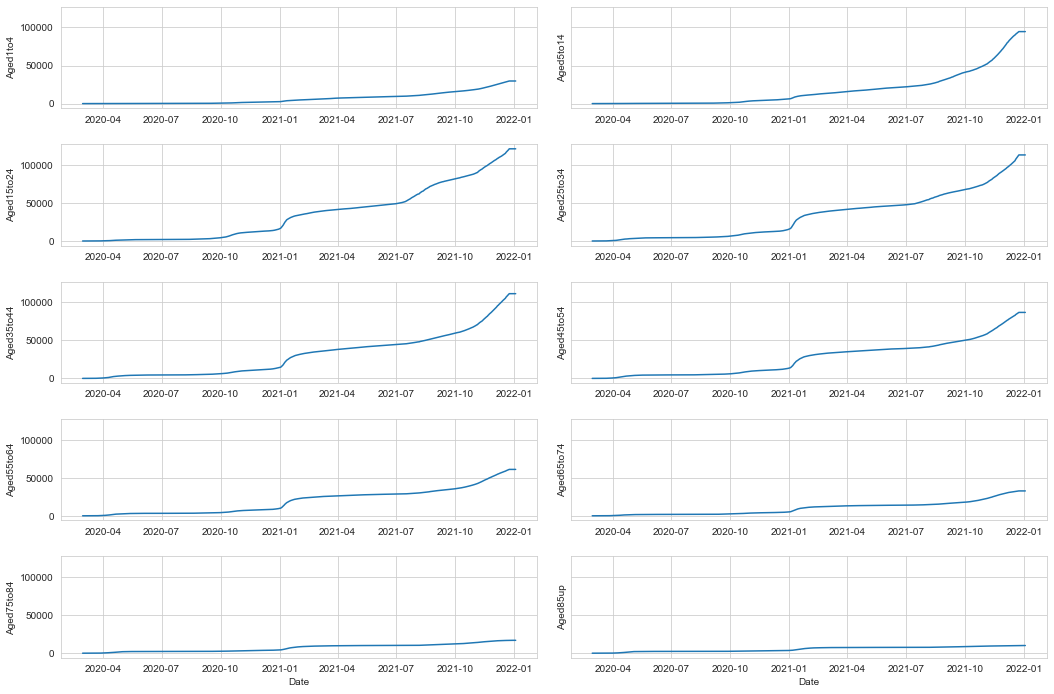

In [198]:
#set up a multiplot area 5 rows by 2 columns  
#share the ylabel so data can be compared more easily
#Set the size of the plots so that they are optimally visualised
fig, ax = plt.subplots(5,2, sharey=True, figsize = (15, 10))

#define what's to go into each plot
ax[0,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged1to4"])
ax[0,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14"])
ax[1,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged15to24"])
ax[1,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged25to34"])
ax[2,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged35to44"])
ax[2,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged45to54"])
ax[3,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged55to64"])
ax[3,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged65to74"])
ax[4,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged75to84"])
ax[4,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged85up"])

#set labels for x and y axes
ax[0,0].set_ylabel("Aged1to4")
ax[0,1].set_ylabel("Aged5to14")
ax[1,0].set_ylabel("Aged15to24")
ax[1,1].set_ylabel("Aged25to34")
ax[2,0].set_ylabel("Aged35to44")
ax[2,1].set_ylabel("Aged45to54")
ax[3,0].set_ylabel("Aged55to64")
ax[3,1].set_ylabel("Aged65to74")
ax[4,0].set_ylabel("Aged75to84")
ax[4,1].set_ylabel("Aged85up")
ax[4,0].set_xlabel("Date")
ax[4,1].set_xlabel("Date")

#Add padding between plots
fig.tight_layout(pad=2.0)

plt.show()

In [ ]:
"""
This visualization is interesting as it's showing
1) the categoreis with highest cases numbers (5to44)
2) in the 15to24 there are 4-5 distinct waves (more bumps) than in the 35to44 age braket
3) I need to change the y axes to analyse patterns of cohorts with smaller case numbers
4) I may need to break the plot in two (2020 and 2021 as cases numbers are much higher in 2021)
"""

Bar Chart race of different age cohorts

In [199]:
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown'],
      dtype='object')

In [263]:
#I make a new df selecting only some columns of main df
Age_Race=covid_IRL_ordered[['Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up']]

#Preparing df for barchart race
#Make cumulative sum of values in each column
Age_Race_cum_sum=Age_Race.cumsum(axis=0)

#Add Date column (I do it now because I didn't want to have a cumsum on this)
Age_Race_cum_sum["Date"] = covid_IRL_ordered["Date"]

Age_Race_cum_sum["Date"] = pd.to_datetime(Age_Race_cum_sum['Date'], format= '%Y-%m-%d')

#set the date column as index
Age_Race_cum_sum=Age_Race_cum_sum.set_index("Date")


In [266]:
#Age_Race_cum_sum.reindex(pd.date_range('2020-02-29', '2022-01-03')).isnull().all(1)

In [235]:
#Age_Race_cum_sum.isna().sum()

In [269]:
#make a smaller dataset to see if it works
#Bar_simple=Age_Race_cum_sum.loc[662:672,:]
#Bar_simple

Bar_simple=Age_Race_cum_sum.loc["2021-12-30":"2022-01-03",:]
Bar_simple

,Aged1to4,Aged5to14,Aged15to24,Aged25to34,Aged35to44,Aged45to54,Aged55to64,Aged65to74,Aged75to84,Aged85up
Date,,,,,,,,,,
2021-12-30 00:00:00+00:00,4488786.0,11730564.0,23634684.0,22083778.0,20392964.0,17791854.0,12920371.0,6624855.0,4696262.0,3533327.0
2021-12-31 00:00:00+00:00,4518446.0,11825087.0,23755713.0,22196771.0,20504195.0,17878480.0,12981272.0,6657504.0,4713171.0,3543389.0
2022-01-01 00:00:00+00:00,4548106.0,11919610.0,23876742.0,22309764.0,20615426.0,17965106.0,13042173.0,6690153.0,4730080.0,3553451.0
2022-01-02 00:00:00+00:00,4577766.0,12014133.0,23997771.0,22422757.0,20726657.0,18051732.0,13103074.0,6722802.0,4746989.0,3563513.0
2022-01-03 00:00:00+00:00,4607426.0,12108656.0,24118800.0,22535750.0,20837888.0,18138358.0,13163975.0,6755451.0,4763898.0,3573575.0


In [245]:
#import sys
!{sys.executable} -m pip install bar_chart_race

In [276]:
#Import python module
import bar_chart_race as bcr

bcr.bar_chart_race(df=Bar_simple, filename=None)


"""
bcr.bar_chart_race(df=Bar_simple,
    filename='covid19_IRL_byAge.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Casese: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Cases in Ireland by Ages',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False) 
    """

Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            

__Plot cases aged 15 to 24 contextualised by school opening/closing dates__

[School opening/closing dates are sourced from here](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/epidemiologyofcovid-19inirelandcasesaged0-18years/COVID-19%20Weekly%20Report_Cases%20aged%200-18yrs_Week%2050_%20Slideset_HPSC_2021220_v1.0.pdf)

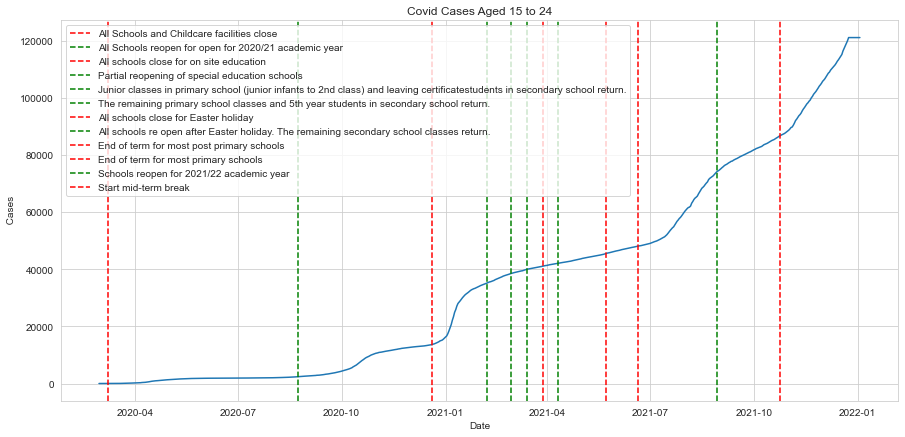

In [77]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged15to24").set_title('Covid Cases Aged 15 to 24')

# set axes labels
plt.xlabel('Date')
plt.ylabel(' Cases')

#add vertical lines to specify key dates
ax.axvline(pd.to_datetime('2020-03-08'),label='All Schools and Childcare facilities close', linestyle='--', color='r')
#ax.axvline(pd.to_datetime('2020-06-29'),label='Childcare facilities reopen', linestyle='--' )
ax.axvline(pd.to_datetime('2020-08-23'),label='All Schools reopen for open for 2020/21 academic year', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2020-12-20'),label='All schools close for on site education', linestyle='--', color='r')
ax.axvline(pd.to_datetime('2021-02-07'),label='Partial reopening of special education schools', linestyle='--',color='g' )
ax.axvline(pd.to_datetime('2021-02-28'),label='Junior classes in primary school (junior infants to 2nd class) and leaving certificatestudents in secondary school return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-03-14'),label='The remaining primary school classes and 5th year students in secondary school return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-03-28'),label='All schools close for Easter holiday', linestyle='--', color='r')
ax.axvline(pd.to_datetime('2021-04-11'),label='All schools re open after Easter holiday. The remaining secondary school classes return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-05-23'),label='End of term for most post primary schools', linestyle='--',color='r')
ax.axvline(pd.to_datetime('2021-06-20'),label='End of term for most primary schools', linestyle='--',color='r')
ax.axvline(pd.to_datetime('2021-08-29'),label='Schools reopen for 2021/22 academic year', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-10-24'),label='Start mid-term break', linestyle='--',color='r')

#create a legend
plt.legend()

plt.show()

__Cases aged 5 to 14 contextualised by school opening/closing__

[School opening/closing dates are sourced from here](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/epidemiologyofcovid-19inirelandcasesaged0-18years/COVID-19%20Weekly%20Report_Cases%20aged%200-18yrs_Week%2050_%20Slideset_HPSC_2021220_v1.0.pdf)

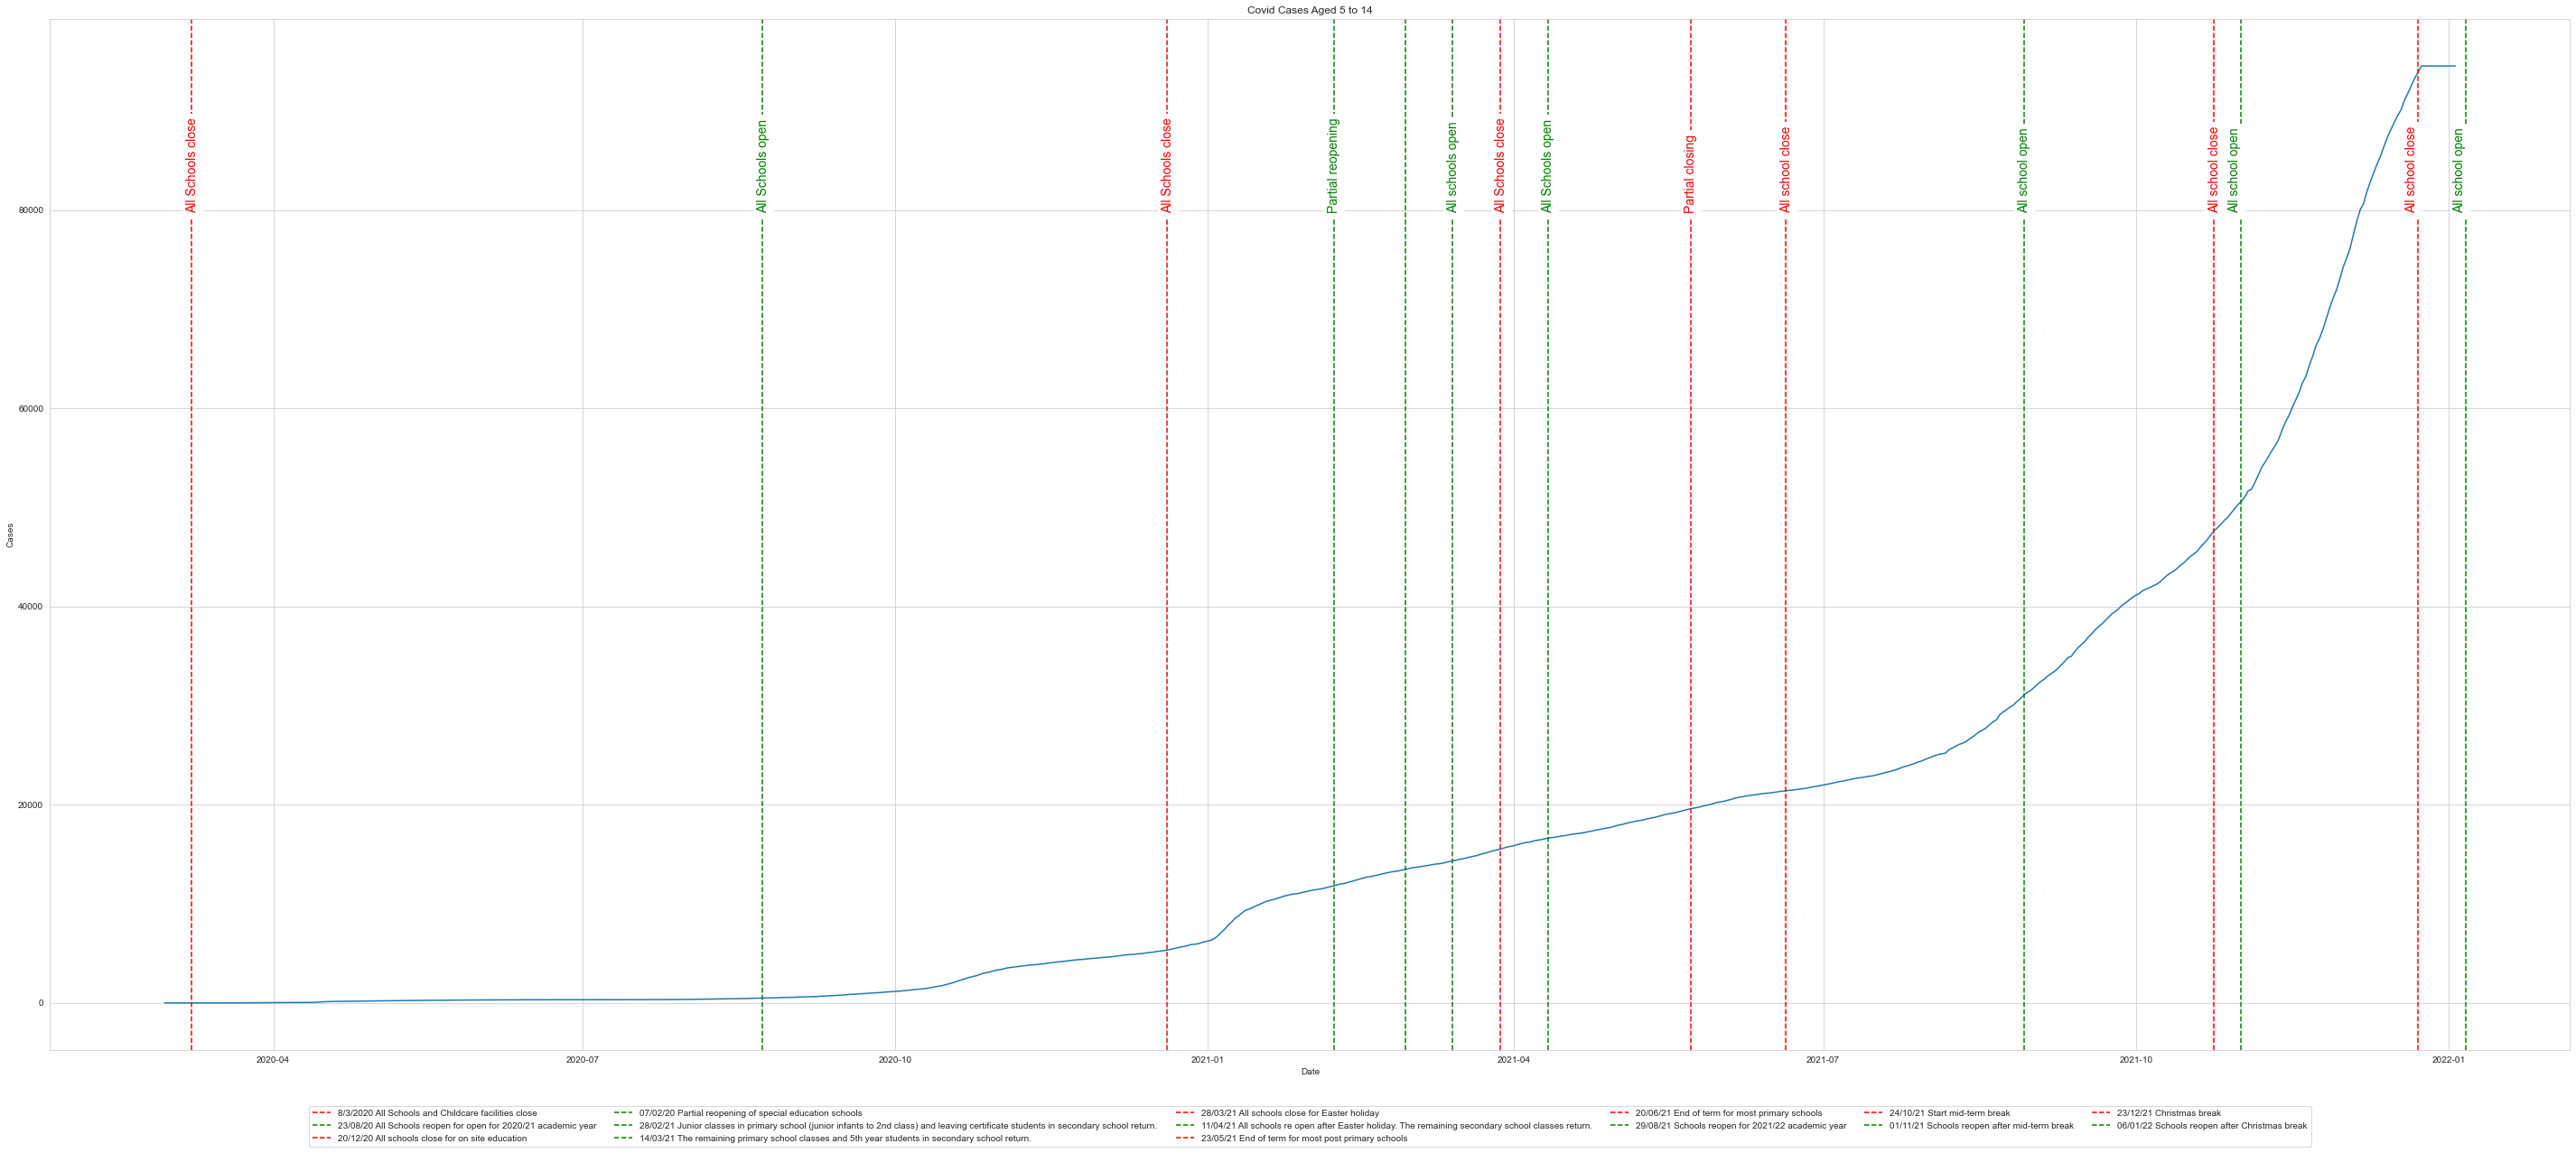

In [196]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (50, 30))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14").set_title('Covid Cases Aged 5 to 14')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases')

"""
I can make a custom funtion for this
by imputting the date, label and line colour to go in the ax.axvline 
and then second date, height and label for plt.text
"""

#add vertical lines to specify key dates

#ax.avline specifies info for line (first location on x axix, then label, then line style and colour)
ax.axvline(pd.to_datetime('2020-03-08'),
           label='8/3/2020 All Schools and Childcare facilities close', 
           linestyle='--', color='r')
#plt.text specifies info for the text (x-coordinate of data label, adjusted to be 2 days after line, y-coordinate of label, label and fontsize)
plt.text(x = pd.to_datetime('2020-03-10'), y = 80000, ha='right',
         s = "All Schools close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

#repeat for all other dates
#ax.axvline(pd.to_datetime('2020-06-29'),label='Childcare facilities reopen', linestyle='--' )

ax.axvline(pd.to_datetime('2020-08-23'),
           label='23/08/20 All Schools reopen for open for 2020/21 academic year', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2020-08-25'), y = 80000, ha="right", 
         s = "All Schools open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-12-20'),
           label='20/12/20 All schools close for on site education', 
           linestyle='--', color='r')
plt.text(x = pd.to_datetime('2020-12-22'), y = 80000, ha="right",
         s = "All Schools close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-02-07'),
           label='07/02/20 Partial reopening of special education schools', 
           linestyle='--',color='g' )
plt.text(x = pd.to_datetime('2021-02-09'), y = 80000, ha="right",
         s = "Partial reopening", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-02-28'),
           label='28/02/21 Junior classes in primary school (junior infants to 2nd class) and leaving certificate students in secondary school return.', 
           linestyle='--',color='g')
#plt.text(x = pd.to_datetime('2021-03-01'), y = 70, s = "Partial reopening", fontsize=14)

ax.axvline(pd.to_datetime('2021-03-14'),
           label='14/03/21 The remaining primary school classes and 5th year students in secondary school return.', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-03-16'), y = 80000, ha="right",
         s = "All schools open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-03-28'),label='28/03/21 All schools close for Easter holiday', 
           linestyle='--', color='r')
plt.text(x = pd.to_datetime('2021-03-30'), y = 80000, ha="right", 
         s = "All Schools close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-04-11'),
           label='11/04/21 All schools re open after Easter holiday. The remaining secondary school classes return.',
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-04-13'),y = 80000, ha="right",
         s = "All Schools open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-05-23'),
           label='23/05/21 End of term for most post primary schools', 
           linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-05-25'), y = 80000, ha="right", 
         s = "Partial closing", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-06-20'),
           label='20/06/21 End of term for most primary schools', 
           linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-06-22'), y = 80000, ha="right", 
         s = "All school close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-08-29'),
           label='29/08/21 Schools reopen for 2021/22 academic year', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-08-31'), y = 80000, ha="right",
         s = "All school open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-10-24'),
           label='24/10/21 Start mid-term break', 
           linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-10-26'), y = 80000, ha="right", 
         s = "All school close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")


ax.axvline(pd.to_datetime('2021-11-01'),
           label='01/11/21 Schools reopen after mid-term break', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-11-01'), y = 80000, ha="right", 
         s = "All school open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-12-23'),
           label='23/12/21 Christmas break', 
           linestyle='--', color='r')
plt.text(x = pd.to_datetime('2021-12-23'), y = 80000, ha="right", 
         s = "All school close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2022-01-06'),
           label='06/01/22 Schools reopen after Christmas break',
           linestyle='--', color='g')
plt.text(x = pd.to_datetime('2022-01-06'), y = 80000, ha="right", 
         s = "All school open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

#create a legend below the plot

# Shrink current axis's height by 30% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.3,
                 box.width, box.height * 0.7])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=10)

plt.show()

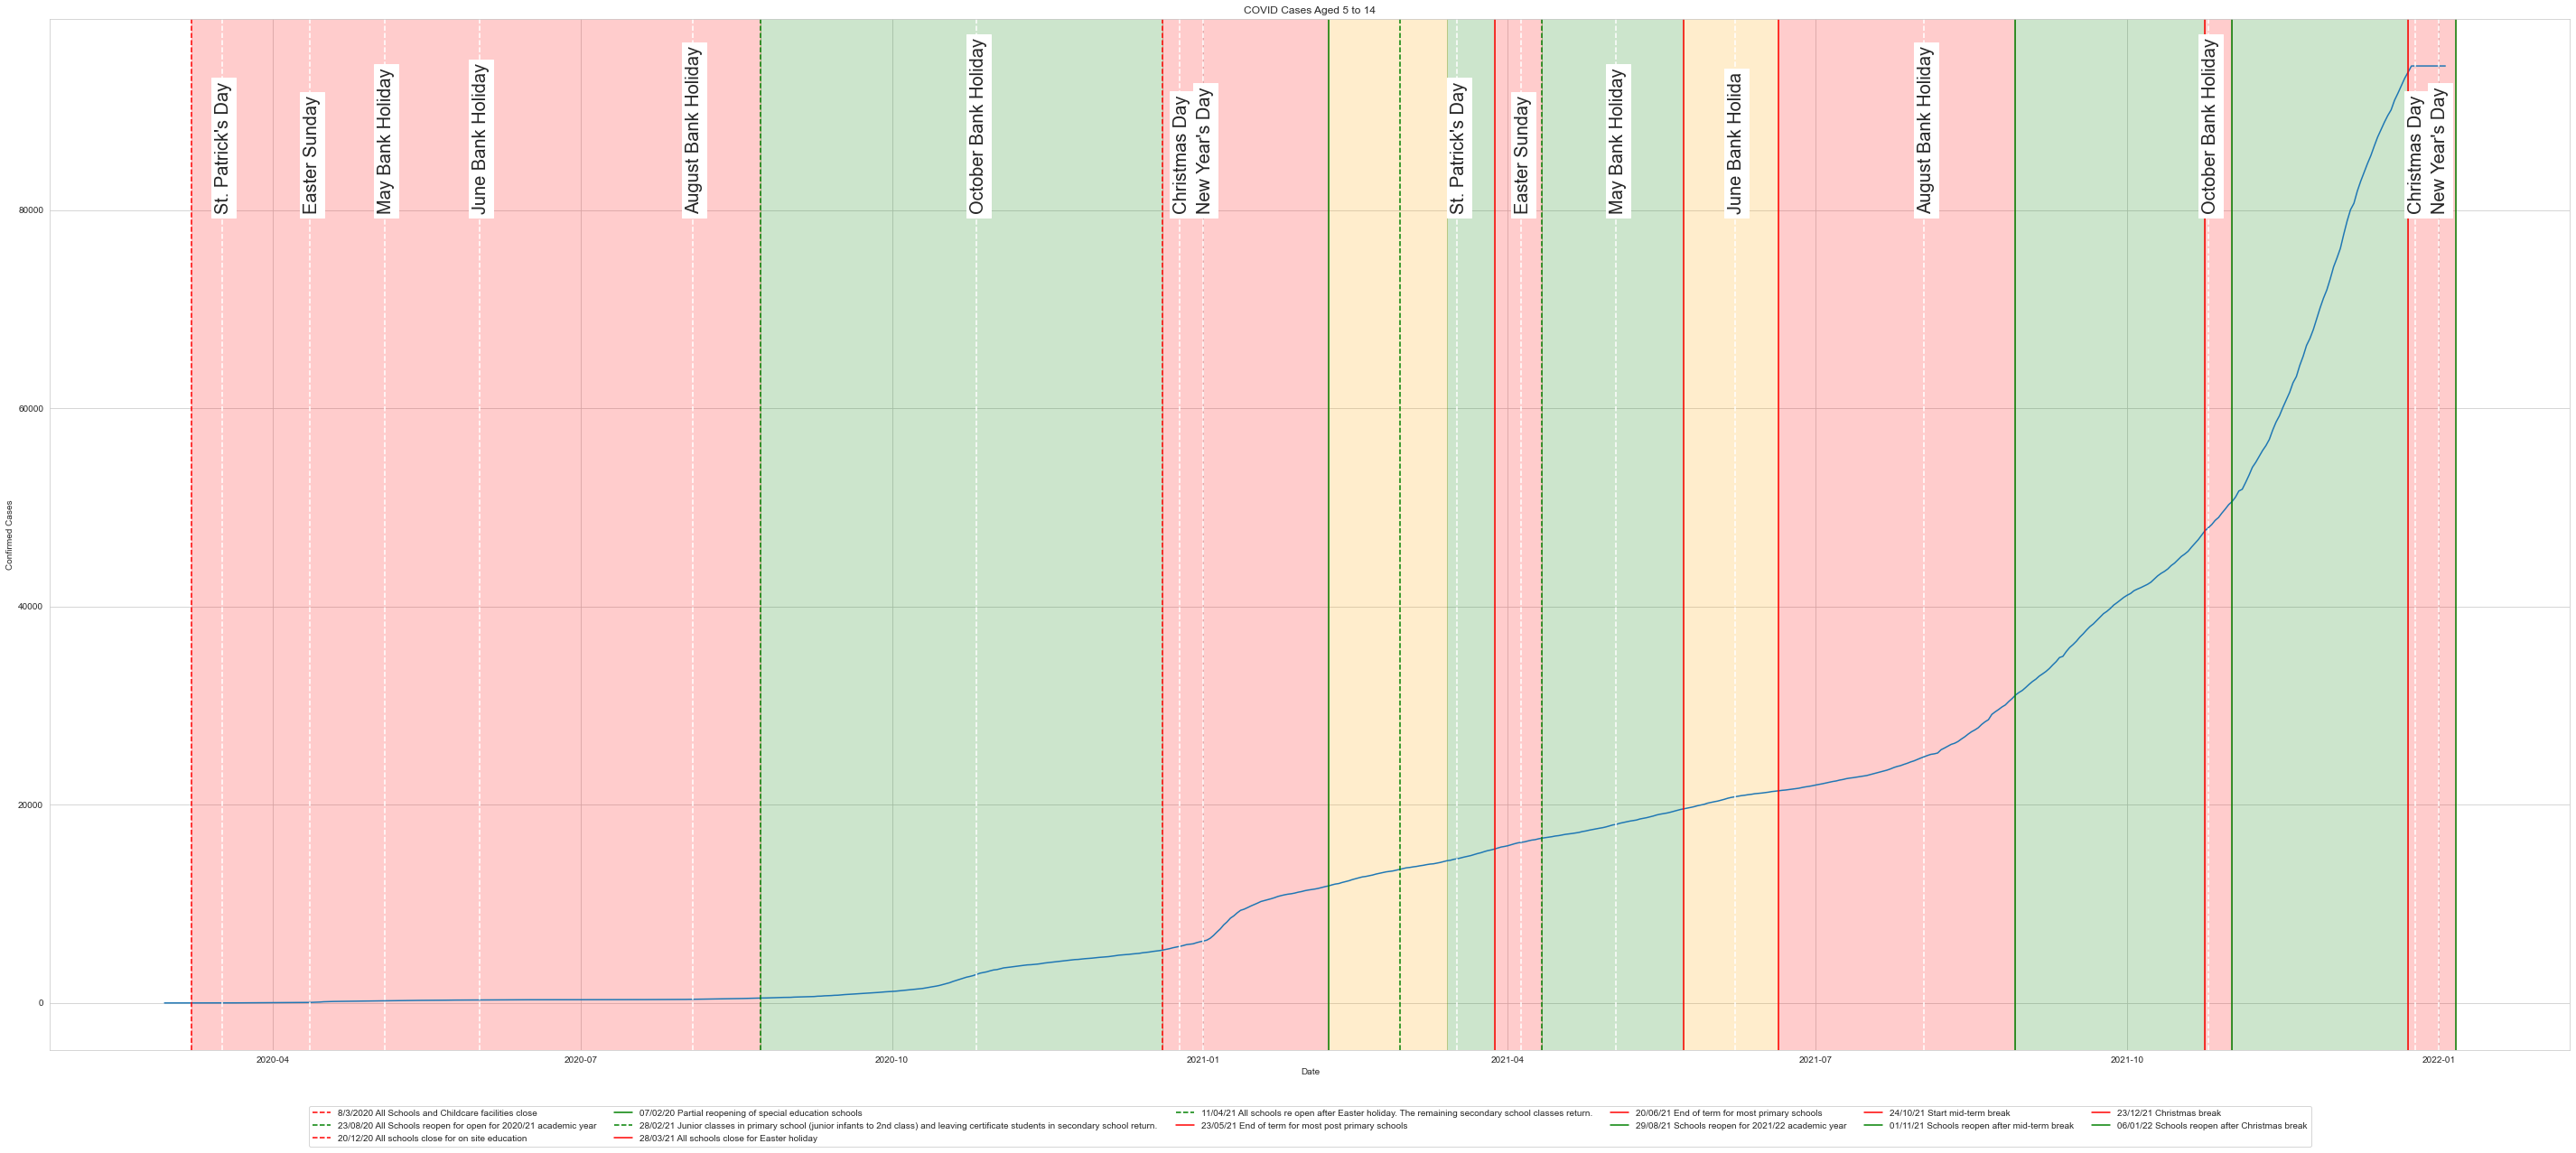

In [183]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure optimising figure size for optimal visualisation of plot
fig, ax = plt.subplots(figsize = (50, 30))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14").set_title('COVID Cases Aged 5 to 14')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

"""
I can make a custom funtion for this
by imputting the date, label and line colour to go in the ax.axvline 
and then second date, and colour for the ax.axvspan box
"""

#add vertical lines to specify key dates

#ax.avline specifies info for line (first location on x axix, then label, then line style and colour)
ax.axvline(pd.to_datetime('2020-03-08'),
           label='8/3/2020 All Schools and Childcare facilities close', 
           linestyle='--', color='r')
ax.axvline(pd.to_datetime('2020-08-23'),
           label='23/08/20 All Schools reopen for open for 2020/21 academic year', 
           linestyle='--',color='g')
#create a shaded box between two dates, setting transparency and colour
ax.axvspan(pd.to_datetime('2020-03-08'), pd.to_datetime('2020-08-23'), alpha=0.2, color='r')

#repeat for all other dates
ax.axvline(pd.to_datetime('2020-12-20'),
           label='20/12/20 All schools close for on site education', 
           linestyle='--', color='r')
ax.axvspan(pd.to_datetime('2020-08-23'), pd.to_datetime('2020-12-20'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-02-07'),
           label='07/02/20 Partial reopening of special education schools', color='g' )
ax.axvspan(pd.to_datetime('2020-12-20'), pd.to_datetime('2021-02-07'), alpha=0.2, color='r')


ax.axvline(pd.to_datetime('2021-02-28'),
           label='28/02/21 Junior classes in primary school (junior infants to 2nd class) and leaving certificate students in secondary school return.', linestyle='--',color='g')
#ax.axvline(pd.to_datetime('2021-03-14'),label='14/03/21 The remaining primary school classes and 5th year students in secondary school return.', linestyle='--',color='g')
ax.axvspan(pd.to_datetime('2021-02-07'), pd.to_datetime('2021-03-14'), alpha=0.2, color='orange')

ax.axvline(pd.to_datetime('2021-03-28'),
           label='28/03/21 All schools close for Easter holiday', color='r')
ax.axvspan(pd.to_datetime('2021-03-14'), pd.to_datetime('2021-03-28'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-04-11'),
           label='11/04/21 All schools re open after Easter holiday. The remaining secondary school classes return.', linestyle='--',color='g')
ax.axvspan(pd.to_datetime('2021-03-28'), pd.to_datetime('2021-04-11'), alpha=0.2, color='r')

ax.axvline(pd.to_datetime('2021-05-23'),
           label='23/05/21 End of term for most post primary schools', color='r')
ax.axvspan(pd.to_datetime('2021-04-11'), pd.to_datetime('2021-05-23'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-06-20'),
           label='20/06/21 End of term for most primary schools', color='r')
ax.axvspan(pd.to_datetime('2021-05-23'), pd.to_datetime('2021-06-20'), alpha=0.2, color='orange')

ax.axvline(pd.to_datetime('2021-08-29'),
           label='29/08/21 Schools reopen for 2021/22 academic year', color='g')
ax.axvspan(pd.to_datetime('2021-06-20'), pd.to_datetime('2021-08-29'), alpha=0.2, color='r')

ax.axvline(pd.to_datetime('2021-10-24'),
           label='24/10/21 Start mid-term break', color='r')
ax.axvspan(pd.to_datetime('2021-08-29'), pd.to_datetime('2021-10-24'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-11-01'),
           label='01/11/21 Schools reopen after mid-term break', color='g')
ax.axvspan(pd.to_datetime('2021-10-24'), pd.to_datetime('2021-11-01'), alpha=0.2, color='r')

ax.axvline(pd.to_datetime('2021-12-23'),
           label='23/12/21 Christmas break', color='r')
ax.axvspan(pd.to_datetime('2021-11-01'), pd.to_datetime('2021-12-23'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2022-01-06'),
           label='06/01/22 Schools reopen after Christmas break',color='g')
ax.axvspan(pd.to_datetime('2022-01-06'), pd.to_datetime('2021-12-23'), alpha=0.2, color='r')



#Add white dotted lines with bank holidays
ax.axvline(pd.to_datetime('2020-03-17'), linestyle='--',color='white')

#add vertical text along the lines at a set height on a white bg, adjusted x position for optimal visualisation
plt.text(x = pd.to_datetime('2020-03-15'), y = 80000, 
         s = "St. Patrick's Day", fontsize=20, rotation=90).set_backgroundcolor("white")

#repeat for all other bank holidays

ax.axvline(pd.to_datetime('2020-04-12'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-04-10'), y = 80000, 
         s = "Easter Sunday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-05-04'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-05-02'), y = 80000, 
         s = "May Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-06-01'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-05-30'), y = 80000, 
         s = "June Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-08-03'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-08-01'), y = 80000, 
         s = "August Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-10-26'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-10-24'), y = 80000, 
         s = "October Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-12-25'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-12-23'), y = 80000, 
         s = "Christmas Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-01-01'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-12-30'), y = 80000, 
         s = "New Year's Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-03-17'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-03-15'), y = 80000, 
         s = "St. Patrick's Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-04-05'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-04-03'), y = 80000, 
         s = "Easter Sunday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-05-03'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-05-01'), y = 80000, 
         s = "May Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-06-07'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-06-05'), y = 80000, 
         s = "June Bank Holida", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-08-02'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-07-31'), y = 80000, 
         s = "August Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-10-25'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-10-23'), y = 80000, 
         s = "October Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-12-25'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-12-23'), y = 80000, 
         s = "Christmas Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2022-01-01'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-12-30'), y = 80000, 
         s = "New Year's Day", fontsize=20, rotation=90).set_backgroundcolor("white")




#create a legend

# Shrink current axis's height by 30% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.3,
                 box.width, box.height * 0.7])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=10)

plt.show()


In [ ]:
"""
I don't see trends linked to opening/closing of schools.
I can see that schools closed upon upward trends, but not cases 
going up because of school openings.

I will check other significant dates e.g. bank holidays
"""

__Total Cases vs hospitalised cases - Aged 5 to 14__

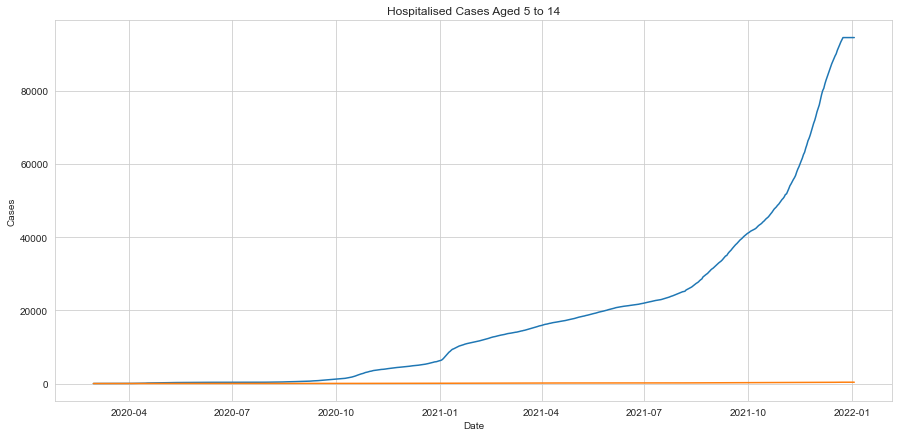

In [152]:
#Two lineplots on the same chart

#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14").set_title('Cases Aged 5 to 14')
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="HospitalisedAged5to14").set_title('Hospitalised Cases Aged 5 to 14')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases')


plt.show()

In [ ]:
"""
The scales are too different so I need to plot the data in two different plots
"""

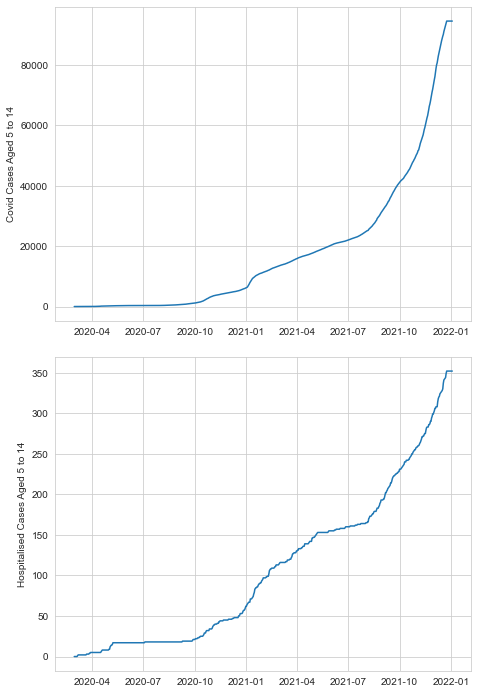

In [86]:
#set up a multiplot area 1 row by 2 columns  
#don't share the ylabel because scales are different but I want to see trend
#Set the size of the plots so that they are optimally visualised
fig, ax = plt.subplots(2,1, figsize = (7, 10))


#define what's to go into each plot
ax[0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14"])
ax[1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["HospitalisedAged5to14"])

#set labels for x and y axes
ax[0].set_ylabel("Covid Cases Aged 5 to 14")
ax[1].set_ylabel("Hospitalised Cases Aged 5 to 14")

#Add padding between plots
fig.tight_layout(pad=2.0)

plt.show()